# Análisis Exploratorio para Homologación de Carreras Universitarias

Este cuaderno forma parte del desarrollo del Reto 01 del Prácticum Data & IA 2025 de la UTPL.  
El objetivo es diseñar una solución de inteligencia de negocios que permita identificar carreras similares entre universidades ecuatorianas y la UTPL, incluso si los nombres no coinciden exactamente.

Este notebook se encargará inicialmente del **análisis exploratorio de datos (EDA)** del archivo `base-datos-abiertos_oferta-academica_05022025.xlsx`. A partir de este análisis se determinará la mejor estrategia de emparejamiento semántico y visualización.

En futuras fases, este notebook actuará como **orquestador principal** de una arquitectura basada en microservicios, ejecutando módulos externos (`.py`) para preprocesamiento, modelado y análisis semántico.

---
### 🗂 Estructura del notebook:

1. **Carga de librerías y configuración del entorno**
2. **Carga del archivo fuente**
3. **Exploración básica del dataset**
4. **Limpieza inicial de columnas irrelevantes y valores nulos**
5. **Análisis exploratorio por variables clave**
6. **Detección de columnas útiles para el matching semántico**
7. **Planificación de módulos externos**

In [1]:
import torch
print("CUDA disponible:", torch.cuda.is_available())
print("Dispositivos disponibles:", torch.cuda.device_count())

CUDA disponible: True
Dispositivos disponibles: 1


In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import unidecode

#from src.embedding_matcher import homologar_carreras

from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from src.embedding_matcher import homologar_optimizado
from src.exporter import export_to_excel

c:\Users\Usuario\Documents\Universidad\6to Ciclo\Practicum 2.2\Proyecto\env\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
df = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')\
    .str.normalize('NFD').str.encode('ascii', errors='ignore').str.decode('ascii')

resultados = homologar_optimizado(df)
export_to_excel(resultados)
resultados.head(10)


🔍 Generando descripciones y embeddings para 6747 claves únicas...


🔗 Generando embeddings: 100%|██████████| 6747/6747 [00:00<00:00, 2250773.01it/s]


📁 Exportado exitosamente a: outputs\resultados_homologacion.xlsx


,id_emparejamiento,id_utpl,nombre_carrera_utpl,descripcion_utpl,campo_amplio_utpl,nivel_formacion_utpl,nombre_ies_utpl,modalidad_utpl,provincia_utpl,id_externa,nombre_carrera_externa,descripcion_externa,campo_amplio_externa,nivel_formacion_externa,nombre_ies_externa,modalidad_externa,provincia_externa,similitud_embeddings
0,5002_140,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,140,ciencias de la educacion ensenanza de la biologia,Tercer Nivel O Pregrado en Ciencias De La Educ...,educacion,tercer nivel o pregrado,escuela superior politecnica de chimborazo,PRESENCIAL,CHIMBORAZO,89.30
1,5002_144,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,144,licenciatura en educacion ambiental,Tercer Nivel O Pregrado en Licenciatura En Edu...,educacion,tercer nivel o pregrado,escuela superior politecnica de chimborazo,SEMIPRESENCIAL,PASTAZA,69.81
2,5002_192,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,192,licenciatura en educacion ambiental,Tercer Nivel O Pregrado en Licenciatura En Edu...,educacion,tercer nivel o pregrado,escuela superior politecnica de chimborazo,SEMIPRESENCIAL,CHIMBORAZO,69.81
3,5002_193,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,193,licenciatura en educacion ambiental,Tercer Nivel O Pregrado en Licenciatura En Edu...,educacion,tercer nivel o pregrado,escuela superior politecnica de chimborazo,SEMIPRESENCIAL,TUNGURAHUA,69.81
4,5002_201,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,201,licenciatura en ciencias de la educacion menci...,Tercer Nivel O Pregrado en Licenciatura En Cie...,educacion,tercer nivel o pregrado,escuela superior politecnica de chimborazo,SEMIPRESENCIAL,ORELLANA,76.92
5,5002_297,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,297,doctorado en investigacion socioeducativa,Tercer Nivel O Pregrado en Doctorado En Invest...,educacion,tercer nivel o pregrado,escuela politecnica del ejercito,DISTANCIA,PICHINCHA,70.61
6,5002_298,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,298,licenciatura en administracion educativa,Tercer Nivel O Pregrado en Licenciatura En Adm...,educacion,tercer nivel o pregrado,escuela politecnica del ejercito,PRESENCIAL,PICHINCHA,70.61
7,5002_299,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,299,licenciatura en administracion educativa,Tercer Nivel O Pregrado en Licenciatura En Adm...,educacion,tercer nivel o pregrado,escuela politecnica del ejercito,DISTANCIA,PICHINCHA,70.61
8,5002_310,5002,ciencias de la educacion mencion quimica y bio...,Carrera de Ciencias De La Educacion Mencion Qu...,educacion,tercer nivel o pregrado,universidad tecnica particular de loja,DISTANCIA,LOJA,310,ciencias de la educacion mencion investigacion...,Tercer Nivel O Pregrado en Ciencias De La Educ...,educacion,tercer nivel o pregrado,escuela politecnica del ejercito,PRESENCIAL,PICHINCHA,80.88
9,5002_312,5002,ciencias de la educacion mencion quimica y bio

In [10]:
import pandas as pd
import re
import unicodedata

def limpiar_nombre_carrera(nombre):
    """Función para normalizar nombres de carreras eliminando tildes y ñ"""
    if pd.isna(nombre):
        return ""
    
    # Convertir a string y minúsculas
    nombre = str(nombre).lower().strip()
    
    # Remover tildes y convertir caracteres especiales
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = ''.join(char for char in nombre if unicodedata.category(char) != 'Mn')
    
    # Convertir ñ a n
    nombre = nombre.replace('ñ', 'n')
    
    # Remover caracteres especiales y puntuación, mantener solo letras, números y espacios
    nombre = re.sub(r'[^\w\s]', '', nombre)
    
    # Normalizar espacios múltiples a uno solo
    nombre = re.sub(r'\s+', ' ', nombre)
    nombre = nombre.strip()
    
    return nombre

# Aplicar la limpieza mejorada
# Leer el primer dataset (original)
df_original = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)
df_original.columns = df_original.columns.str.strip().str.lower().str.replace(' ', '_')

# Crear lista de carreras UTPL del original con limpieza mejorada
utpl_mask = df_original['nombre_ies'].str.contains('universidad tecnica particular de loja', case=False, na=False)
carreras_original_raw = df_original[utpl_mask]['nombre_carrera'].unique()
lista_carreras_original = [limpiar_nombre_carrera(carrera) for carrera in carreras_original_raw]
lista_carreras_original = [c for c in lista_carreras_original if c]  # Remover vacíos

print(f"Lista original limpia: {len(lista_carreras_original)} carreras")

# Leer el segundo dataset (homologación)
df_homologacion = pd.read_excel("outputs/resultados_homologacion.xlsx")

# Crear lista de carreras de homologación con limpieza mejorada
carreras_homologacion_raw = df_homologacion['nombre_carrera_utpl'].unique()
lista_carreras_homologacion = [limpiar_nombre_carrera(carrera) for carrera in carreras_homologacion_raw]
lista_carreras_homologacion = [c for c in lista_carreras_homologacion if c]  # Remover vacíos

print(f"Lista homologación limpia: {len(lista_carreras_homologacion)} carreras")

# Comparar listas limpias
set_original = set(lista_carreras_original)
set_homologacion = set(lista_carreras_homologacion)

carrera_faltante = set_original - set_homologacion
carrera_extra = set_homologacion - set_original

print(f"\nDiferencias después de limpieza mejorada:")
print(f"En original pero NO en homologación: {len(carrera_faltante)}")
print(f"En homologación pero NO en original: {len(carrera_extra)}")

if carrera_faltante:
    print(f"\nCarreras faltantes en homologación:")
    for carrera in sorted(carrera_faltante):
        print(f"- {carrera}")

if carrera_extra:
    print(f"\nCarreras extra en homologación:")
    for carrera in sorted(carrera_extra):
        print(f"- {carrera}")

Lista original limpia: 209 carreras
Lista homologación limpia: 208 carreras

Diferencias después de limpieza mejorada:
En original pero NO en homologación: 1
En homologación pero NO en original: 0

Carreras faltantes en homologación:
- maestria en orientacion y educacion familiar


In [1]:
import pandas as pd
import unidecode

# === 1. Cargar el archivo Excel como lo haces normalmente ===
df = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)

# Normalizar nombres de columnas y quitar acentos
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.normalize('NFD')
    .str.encode('ascii', errors='ignore')
    .str.decode('ascii')
)

# Normalizar texto en la columna de universidad
df['nombre_ies'] = df['nombre_ies'].astype(str).apply(lambda x: unidecode.unidecode(x.strip().lower()))

# === 2. Separar la UTPL y las demás universidades ===
df_utpl = df[df['nombre_ies'] == 'universidad tecnica particular de loja'].copy()
df_otros = df[df['nombre_ies'] != 'universidad tecnica particular de loja'].copy()

# Mostrar cantidad de filas para verificación
print(f"Carreras UTPL: {len(df_utpl)}")
print(f"Carreras otras universidades: {len(df_otros)}")

# === 3. Exportar archivos separados si deseas compartirlos ===
df_utpl.to_csv("utpl_carreras.csv", index=False)
df_otros.to_csv("otras_carreras.csv", index=False)


Carreras UTPL: 350
Carreras otras universidades: 19695


In [ ]:
df = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.normalize('NFD').str.encode('ascii', errors='ignore').str.decode('ascii')

resultados = homologar_mistral_filtrado(df)
export_to_excel(resultados)
resultados.head(10)

[18:31:05] ⏱️ Procesando bloque: campo=educacion, nivel=tercer nivel o pregrado


In [ ]:



# Configuración visual y de entorno
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
%matplotlib inline

# Confirmación de entorno
print("Entorno EDA inicial cargado correctamente ✅")


Entorno EDA inicial cargado correctamente ✅


In [ ]:
# Cargar el archivo Excel omitiendo las filas superiores informativas
df = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)

# Confirmar lectura
print(f"✅ Dimensiones del archivo: {df.shape}")
df.head()


✅ Dimensiones del archivo: (20045, 10)


,NOMBRE_IES,TIPO_IES,TIPO_FINANCIAMIENTO,NOMBRE_CARRERA,CAMPO_AMPLIO,NIVEL_FORMACIÓN,MODALIDAD,PROVINCIA,CANTÓN,ESTADO
0,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA AGROINDUSTRIAL,AGRICULTURA,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
1,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, EDUCACION COMERCIAL Y DERECHO",TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
2,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN ELECTRONICA Y REDES DE INFORMACION,"INGENIERIA, INDUSTRIA Y CONSTRUCCION",TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
3,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN SISTEMAS INFORMATICOS Y DE COMPU...,CIENCIAS,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
4,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA INFORMATICA,CIENCIAS,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS


In [ ]:


# Renombrar columnas: minúsculas, sin tildes, con guiones bajos
df.columns = [
    unidecode.unidecode(col).lower().replace(" ", "_")
    for col in df.columns
]

# Verificamos el resultado
print("🧾 Columnas renombradas:")
print(df.columns.tolist())


🧾 Columnas renombradas:
['nombre_ies', 'tipo_ies', 'tipo_financiamiento', 'nombre_carrera', 'campo_amplio', 'nivel_formacion', 'modalidad', 'provincia', 'canton', 'estado']


In [ ]:
# Verificar nombres de columnas y tipos
print("🧾 Columnas disponibles:")
print(df.columns.tolist())

print("\n📌 Tipos de datos:")
print(df.dtypes)

# Verificar valores únicos por columna
print("\n🔎 Valores únicos por columna (resumen):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")


🧾 Columnas disponibles:
['nombre_ies', 'tipo_ies', 'tipo_financiamiento', 'nombre_carrera', 'campo_amplio', 'nivel_formacion', 'modalidad', 'provincia', 'canton', 'estado']

📌 Tipos de datos:
nombre_ies             object
tipo_ies               object
tipo_financiamiento    object
nombre_carrera         object
campo_amplio           object
nivel_formacion        object
modalidad              object
provincia              object
canton                 object
estado                 object
dtype: object

🔎 Valores únicos por columna (resumen):
nombre_ies: 292 únicos
tipo_ies: 2 únicos
tipo_financiamiento: 4 únicos
nombre_carrera: 5715 únicos
campo_amplio: 23 únicos
nivel_formacion: 7 únicos
modalidad: 8 únicos
provincia: 24 únicos
canton: 179 únicos
estado: 3 únicos


In [ ]:
# Nombres de columnas
print("🔍 Columnas disponibles:")
print(df.columns.tolist())

# Tipos de datos
df.info()

# Valores nulos
print("\n📉 Porcentaje de nulos por columna:")
print(df.isnull().mean().round(3) * 100)


🔍 Columnas disponibles:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20051 non-null  object
 1   Unnamed: 1  20045 non-null  object
 2   Unnamed: 2  20046 non-null  object
 3   Unnamed: 3  20046 non-null  object
 4   Unnamed: 4  20046 non-null  object
 5   Unnamed: 5  20046 non-null  object
 6   Unnamed: 6  20046 non-null  object
 7   Unnamed: 7  20046 non-null  object
 8   Unnamed: 8  20046 non-null  object
 9   Unnamed: 9  20046 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB

📉 Porcentaje de nulos por columna:
Unnamed: 0    0.0
Unnamed: 1    0.1
Unnamed: 2    0.1
Unnamed: 3    0.1
Unnamed: 4    0.1
Unnamed: 5    0.1
Unnamed: 6    0.1
Unnamed: 7    0.1
Unnamed: 8    0.1
Unnamed

In [ ]:
# Copia de respaldo por seguridad
df_raw = df.copy()

# Normalización de texto para consistencia
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# Verificamos si hay duplicados exactos
print(f"\n📛 Duplicados exactos: {df.duplicated().sum()}")

df.info()



📛 Duplicados exactos: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20051 non-null  object
 1   Unnamed: 1  20045 non-null  object
 2   Unnamed: 2  20046 non-null  object
 3   Unnamed: 3  20046 non-null  object
 4   Unnamed: 4  20046 non-null  object
 5   Unnamed: 5  20046 non-null  object
 6   Unnamed: 6  20046 non-null  object
 7   Unnamed: 7  20046 non-null  object
 8   Unnamed: 8  20046 non-null  object
 9   Unnamed: 9  20046 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [ ]:
# Universidades con más carreras
top_ies = df['nombre_ies'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_ies.values, y=top_ies.index, palette="Blues_r")
plt.title("Top 10 instituciones con más carreras registradas")
plt.xlabel("Cantidad de carreras")
plt.ylabel("IES")
plt.tight_layout()
plt.show()


KeyError: 'nombre_ies'

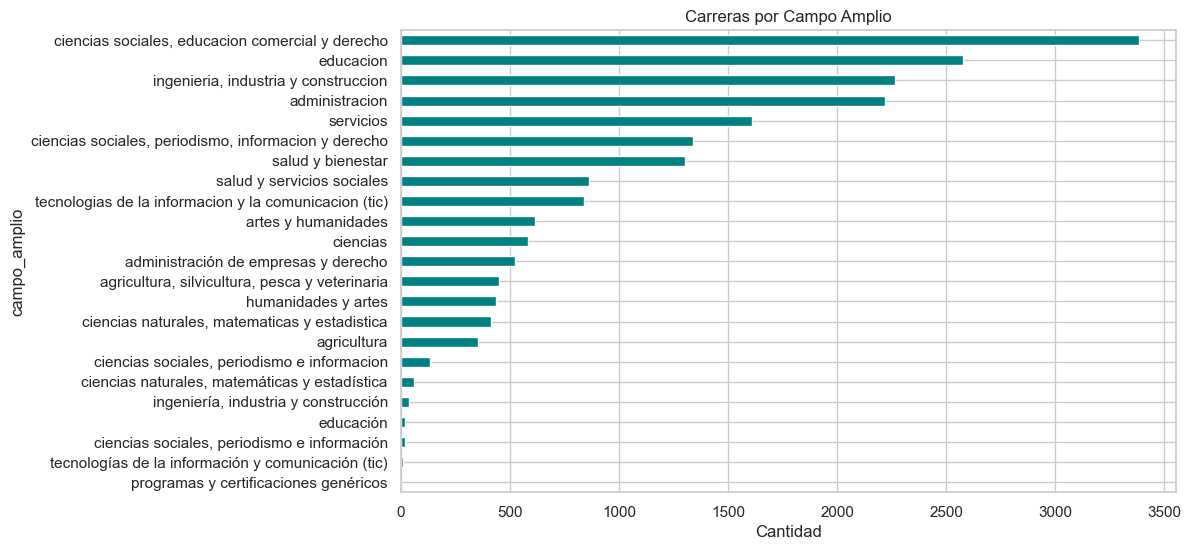

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29356\1809309438.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=moda_counts.index, y=moda_counts.values, palette="Set2")


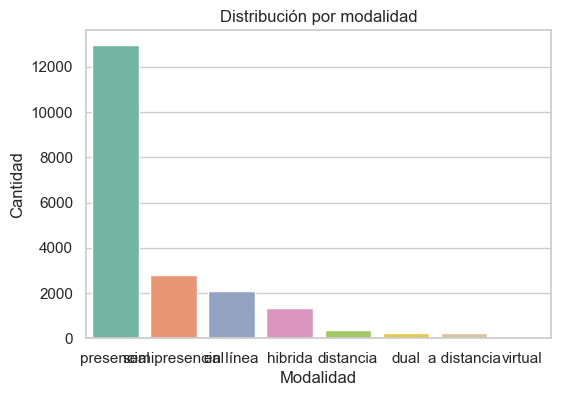

In [ ]:
# Carreras por campo amplio
plt.figure(figsize=(10, 6))
df['campo_amplio'].value_counts().plot(kind='barh', color='teal')
plt.title("Carreras por Campo Amplio")
plt.xlabel("Cantidad")
plt.gca().invert_yaxis()
plt.show()

# Carreras por modalidad
moda_counts = df['modalidad'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=moda_counts.index, y=moda_counts.values, palette="Set2")
plt.title("Distribución por modalidad")
plt.ylabel("Cantidad")
plt.xlabel("Modalidad")
plt.show()


In [ ]:
# Distribución por estado
estado_counts = df['estado'].value_counts()
print("🗂 Estados posibles de carreras:")
print(estado_counts)

# Nivel de formación
nivel_counts = df['nivel_formacion'].value_counts()
print("\n🎓 Niveles de formación:")
print(nivel_counts)


🗂 Estados posibles de carreras:
estado
no vigente habilitado para registro de títulos    8192
vigente                                           8014
no vigente habilitada para registro de título     3839
Name: count, dtype: int64

🎓 Niveles de formación:
nivel_formacion
educación superior de grado o tercer nivel         4178
educación superior de posgrado o cuarto nivel      4057
tercer nivel o pregrado                            3200
cuarto nivel o posgrado                            3159
tercer nivel tecnológico superior                  2755
tercer nivel técnico superior                      2324
tercer nivel tecnológico superior universitario     372
Name: count, dtype: int64


In [ ]:
df.describe(include='all')

,nombre_ies,tipo_ies,tipo_financiamiento,nombre_carrera,campo_amplio,nivel_formacion,modalidad,provincia,canton,estado
count,20044,20044,20045,20045,20045,20045,20045,20045,20045,20045
unique,292,2,4,5712,23,7,8,24,179,3
top,pontificia universidad catolica del ecuador,universidad,pública,administracion de empresas,"ciencias sociales, educacion comercial y derecho",educación superior de grado o tercer nivel,presencial,pichincha,quito,no vigente habilitado para registro de títulos
freq,957,15690,9524,471,3384,4178,12966,5875,5418,8192


In [ ]:
# Aplicar la homologación sobre el dataframe filtrado
resultados = homologar_carreras(df)

# Vista previa
resultados.sort_values(by="similitud", ascending=False).head(10)

,nombre_ies,nombre_carrera_externa,campo_amplio,nivel_formacion,modalidad,provincia,carrera_utpl,similitud
9430,universidad tecnica de manabi,turismo,servicios,educación superior de grado o tercer nivel,en línea,manabí,turismo,100.0
14438,universidad regional autonoma de los andes,turismo,servicios,educación superior de grado o tercer nivel,presencial,imbabura,turismo,100.0
14440,universidad regional autonoma de los andes,turismo,servicios,educación superior de grado o tercer nivel,presencial,santo domingo de los tsáchilas,turismo,100.0
14457,universidad regional autonoma de los andes,turismo,servicios,educación superior de posgrado o cuarto nivel,presencial,tungurahua,turismo,100.0
11570,pontificia universidad catolica del ecuador,educacion basica,educacion,educación superior de grado o tercer nivel,semipresencial,pichincha,educacion basica,100.0
14458,universidad regional autonoma de los andes,derecho,"ciencias sociales, periodismo, informacion y d...",educación superior de posgrado o cuarto nivel,hibrida,tungurahua,derecho,100.0
14459,universidad regional autonoma de los andes,derecho,"ciencias sociales, periodismo, informacion y d...",educación superior de posgrado o cuarto nivel,en línea,tungurahua,derecho,100.0
11569,pontificia universidad catolica del ecuador,educacion basica,educacion,educación superior de grado o tercer nivel,semipresencial,esmeraldas,educacion basica,100.0
11568,pontificia universidad catolica del ecuador,educacion basica,educacion,educación superior de grado o tercer nivel,presencial,santo domingo de los tsáchilas,educacion basica,100.0
14460,universidad regional autonoma de los andes,derecho,"ciencias sociales, periodismo, informacion y d...",educación superior de posgrado o cuarto nivel,hibrida,los ríos,derecho,100.0


In [ ]:
df[df['nombre_ies'] == 'universidad tecnica particular de loja'].shape[0]

350

Batches:   0%|          | 0/175 [00:00<?, ?it/s]

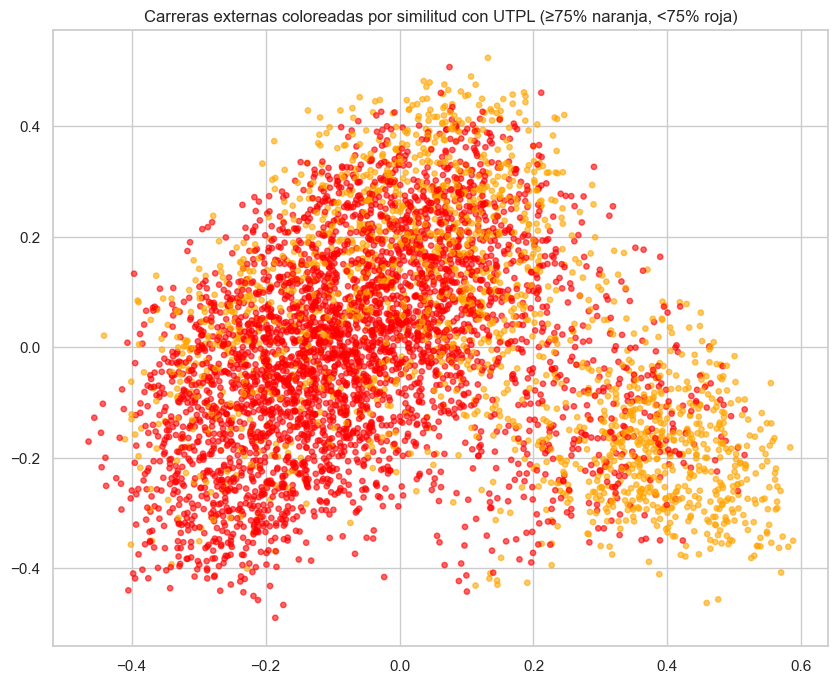

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filtrar resultados únicos por nombre_carrera_externa
resultados_unicos = resultados.drop_duplicates(subset='nombre_carrera_externa').copy()

# Vectorizar las carreras externas desde resultados
textos = resultados_unicos['nombre_carrera_externa'].tolist()
sim_scores = resultados_unicos['similitud'].tolist()
colors = ['orange' if score >= 75 else 'red' for score in sim_scores]

# Embeddings
embeddings = model.encode(textos, show_progress_bar=True)

# Reducción PCA
coords = PCA(n_components=2).fit_transform(embeddings)

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], c=colors, alpha=0.6, s=15)

plt.title("Carreras externas coloreadas por similitud con UTPL (≥75% naranja, <75% roja)")
plt.grid(True)
plt.show()
